In [1]:
#Set of preliminary definitions, might add to this later
#Edit: Update for Illustris-1-->TNG100-1; subhalo-mass-->stellar-mass

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
from io import StringIO
import io

#imported requests
import requests

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"bc47cc6e1bd83ad2708bc714f126dc09"}

#defined get()
def get(path, params=None):
    # make HTTP GET request to path
    headers = {"api-key":"bc47cc6e1bd83ad2708bc714f126dc09"}
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r


In [2]:
#Refer to TASK 2 at: https://www.tng-project.org/data/docs/api/ (login required for access)

# first convert log solar masses into group catalog units
#Search for stellar mass range and define redshift
redshift = 2.0
h = 0.6774 #in TNG100-1 scaling, 0.704 in Illustris-1
mass_min = 10**10 / 1e10 * h
mass_max = 10**12 / 1e10 * h

# form the search_query string by hand for once
search_query = "?mass_stars__gt=" + str(mass_min) + "&mass_stars__lt=" + str(mass_max)
search_query

'?mass_stars__gt=0.6774&mass_stars__lt=67.74'

In [3]:
# form the url and make the request
#filter here for redshift#
url = "http://www.tng-project.org/api/TNG100-1/snapshots/z=" + str(redshift) + "/subhalos/" + search_query

subhalos = get(url, {'limit':5000})
subhalos['count'] #3050

3050

In [4]:
ids = [ subhalos['results'][i]['id'] for i in range(subhalos['count']) ] #to include all results
print(len(ids))

3050


In [5]:
#define scaling factors prior to plotting

a = 1 / (1 + redshift) #is this the scale factor?
mass_unit = 1e10/h
length_unit = a/h

In [ ]:
#File Saved! Do not run again
#saving z=2 Stellar Masses and Half-Mass Radii 
#do not need to run again, as long as local copy exists!

mass_stars = np.zeros(subhalos['count'])
halfmassrad_stars = np.zeros(subhalos['count'])

for i, id in enumerate(ids[:subhalos['count']]): #need to know # of elements to implement #append is slower
    url = "http://www.tng-project.org/api/TNG100-1/snapshots/z=" + str(redshift) + "/subhalos/" + str(id)
    subhalo = get(url)
    mass_stars[i] = subhalo['mass_stars']
    halfmassrad_stars[i] = subhalo['halfmassrad_stars']

np.savetxt('z=2_Stellar_Masses', mass_stars)
np.savetxt('z=2_Half_Mass_Radii', halfmassrad_stars)
    

In [6]:
#extract from local file
Stellar_Masses = np.loadtxt('z=2_Stellar_Masses', dtype=float)
Half_Mass_Radii = np.loadtxt('z=2_Half_Mass_Radii', dtype=float)

print(len(Stellar_Masses))
print(len(Half_Mass_Radii))

3050
3050


Text(0, 0.5, 'Half Mass Radius [kpc]')

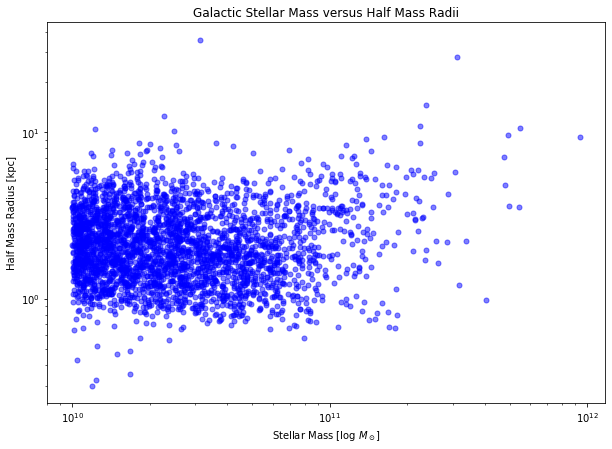

In [7]:
#generating the plot
#plot for saved arrays

plt.figure(figsize=(10,7)) # 10 is width, 7 is height

plt.plot((Stellar_Masses * mass_unit), (Half_Mass_Radii * length_unit), 'bo', ms=5, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Galactic Stellar Mass versus Half Mass Radii')
plt.xlabel('Stellar Mass [log $M_\odot$]')
plt.ylabel('Half Mass Radius [kpc]')
#this is a plot of stellar masses